![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# River and Lake Water Levels


### Recommended Grade levels: 6-12
<br>

### Instructions
#### “Run” the cells to see the graphs
Click “Cell” and select “Run All”.<br> This will import the data and run all the code, so you can see this week's data visualization. Scroll to the top after you’ve run the cells.<br> 

![instructions](https://github.com/callysto/data-viz-of-the-week/blob/main/images/instructions.png?raw=true)

**You don’t need to do any coding to view the visualizations**.
The plots generated in this notebook are interactive. You can hover over and click on elements to see more information. 

Email contact@callysto.ca if you experience issues.

### About this Notebook

Callysto's Weekly Data Visualization is a learning resource that aims to develop data literacy skills. We provide Grades 5-12 teachers and students with a data visualization, like a graph, to interpret. This companion resource walks learners through how the data visualization is created and interpreted by a data scientist. 

The steps of the data analysis process are listed below and applied to each weekly topic.

1. Question - What are we trying to answer? 
2. Gather - Find the data source(s) you will need. 
3. Organize - Arrange the data, so that you can easily explore it. 
4. Explore - Examine the data to look for evidence to answer the question. This includes creating visualizations. 
5. Interpret - Describe what's happening in the data visualization. 
6. Communicate - Explain how the evidence answers the question. 

# Question

Is water levels in Canada reaching *record* highs?

### Goal
Our goal is to show that water levels in Canada have reached record highs, based on all provinces with lakes and river.s

We will use line graphs to visually represent the data in an informative way. 

# Gather

### Code:
The code below will import the Python programming libraries we need to gather and organize the data to answer our question.

In [1]:
## import libraries
import pandas as pd
import plotly.express as px

### Data:

The Shuswap Lake is a popular and large lake in the Okanagan Region of the province of British Columbia. The water levels of this particular lake fluctuates over the year due to rain fall and snow run off coming from the mountains.

[![Shuswap Lake](https://img.youtube.com/vi/1fJlFh4eJ08/0.jpg)](https://www.youtube.com/watch?v=1fJlFh4eJ08)

### Import the data

In [2]:
# import data
#URL https://dd.weather.gc.ca/hydrometric/
station = "08LE070"
shuswap_data= pd.read_csv(f'https://dd.weather.gc.ca/hydrometric/csv/BC/daily/BC_{station}_daily_hydrometric.csv')
shuswap_data

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1002)>

### Comment on the data


In [ ]:
#Display the coloumn names
print(*shuswap_data.columns, sep='\n')

 ID
Date
Water Level / Niveau d'eau (m)
Grade
Symbol / Symbole
QA/QC
Discharge / Débit (cms)
Grade.1
Symbol / Symbole.1
QA/QC.1


In [ ]:
#Display dataframe by date and water level
shuswap_data[["Date", "Water Level / Niveau d'eau (m)"]]

Date  Water Level / Niveau d'eau (m)
0     2023-05-08T00:00:00-08:00                         346.187
1     2023-05-08T00:05:00-08:00                         346.189
2     2023-05-08T00:10:00-08:00                         346.193
3     2023-05-08T00:15:00-08:00                         346.197
4     2023-05-08T00:20:00-08:00                         346.199
...                         ...                             ...
8561  2023-06-06T17:35:00-08:00                         348.146
8562  2023-06-06T17:40:00-08:00                         348.142
8563  2023-06-06T17:45:00-08:00                         348.143
8564  2023-06-06T17:50:00-08:00                         348.143
8565  2023-06-06T17:55:00-08:00                         348.144

[8566 rows x 2 columns]

In [ ]:
from datetime import datetime
from datetime import date
shuswap_data['date_ordinal'] = pd.to_datetime(shuswap_data['Date']).apply(lambda date: date.toordinal())
shuswap_data['date_ordinal']

0       738648
1       738648
2       738648
3       738648
4       738648
         ...  
8561    738677
8562    738677
8563    738677
8564    738677
8565    738677
Name: date_ordinal, Length: 8566, dtype: int64

In [ ]:
average_of_dates = shuswap_data.groupby(['date_ordinal'], as_index=False)["Water Level / Niveau d'eau (m)"].mean()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_train = average_of_dates['date_ordinal'].to_numpy()
y_train = average_of_dates["Water Level / Niveau d'eau (m)"].to_numpy()
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [738648 738649 738650 738651 738652 738653 738654 738655 738656 738657
 738658 738659 738660 738661 738662 738663 738664 738665 738666 738667
 738668 738669 738670 738671 738672 738673 738674 738675 738676 738677]
y_train = [346.26048264 346.39061806 346.5123125  346.62134722 346.72294097
 346.82801736 346.98148611 347.12465505 347.27653819 347.43652083
 347.57490972 347.72335764 347.85982292 347.97895833 348.10085417
 348.22118118 348.33196528 348.38182986 348.40454514 348.41715625
 348.43176736 348.43438889 348.44348958 348.42423611 348.39310417
 348.35323611 348.31822569 348.26642014 348.225375   348.17506944]


In [ ]:
extreme_data = pd.read_csv("https://raw.githubusercontent.com/callysto/data-files/main/Science/WaterLevels/annual_extremes.csv", skiprows=1)
extreme_data

In [ ]:
test_data = pd.read_csv("https://raw.githubusercontent.com/callysto/data-files/main/Science/WaterLevels/shuswap_data.csv", skiprows=1)
test_data

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)>

In [ ]:
max_level = extreme_data.query('MAX == MAX.max()')
min_level = extreme_data.query('MIN == MIN.min()')
print(f"The largest value found is {max_level['MAX']} in {max_level['Year']}")
display(max_level, min_level)

In [ ]:
sect_test_data = test_data.query('YEAR == 2021')
display(sect_test_data)

ID  PARAM  YEAR   DD    Value  SYM
13188  08LE070      2  2021    1  345.400  NaN
13189  08LE070      2  2021    2  345.391  NaN
13190  08LE070      2  2021    3  345.388  NaN
13191  08LE070      2  2021    4  345.387  NaN
13192  08LE070      2  2021    5  345.387  NaN
...        ...    ...   ...  ...      ...  ...
13548  08LE070      2  2021  361  345.972  NaN
13549  08LE070      2  2021  362  345.944  NaN
13550  08LE070      2  2021  363  345.920  NaN
13551  08LE070      2  2021  364  345.899  NaN
13552  08LE070      2  2021  365  345.877  NaN

[365 rows x 6 columns]

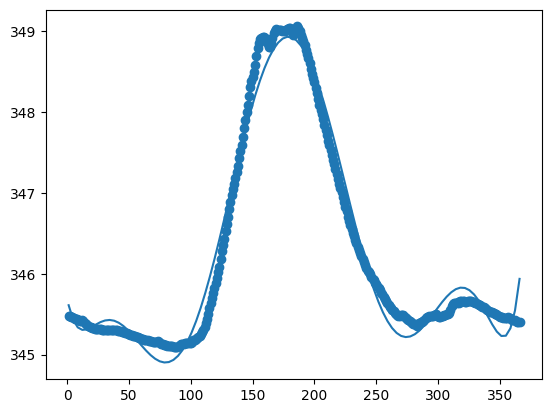

In [ ]:
x_train = sect_test_data['DD'].to_numpy()
y_train = sect_test_data["Value"].to_numpy()

mymodel = np.poly1d(np.polyfit(x_train, y_train, 8))
myline = np.linspace(min(x_train), max(x_train), 100)
plt.scatter(x_train, y_train)
plt.plot(myline, mymodel(myline))
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_train, mymodel(x_train))

0.9779255162588845

In [ ]:
test_metric1 = mymodel(1)
test_metric2 = mymodel(365)
print(test_metric1)
print(test_metric2)

NameError: name 'mymodel' is not defined

In [ ]:
predicted_values = []
predicted_dates = []
for i in range(1, 366):
    predicted_values.append(mymodel(i))
    predicted_dates.append(i)

print(predicted_dates)
print(predicted_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, shared_xaxes=True)

fig.add_trace(
    go.Scatter(x=x_train, y=y_train),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=predicted_dates, y=predicted_values),
    row=1, col=2
)

fig.update_layout(title_text="Side By Side Waterlevels and Predicted Waterlevels")
fig.show()

In [ ]:
px.scatter(test_data, x='DD', y='Value', color='YEAR').show()

all_fig_compare = make_subplots(rows=1, cols=2, shared_xaxes=True)

all_fig_compare.add_trace(
    go.Scatter(x=x_train, y=y_train),
    row=1, col=1
)

all_fig_compare.add_trace(
    go.Scatter(x=test_data['DD'], y=test_data['Value'], color='YEAR'),
    row=1, col=2
)

all_fig_compare.update_layout(title_text="Side By Side Waterlevels all Years and Predicted Waterlevels")
all_fig_compare.show()

# Visualization for Shuswap Lake Levels

Real time data for the Shuswap Lake

In [ ]:
px.line(shuswap_data, x="Date", y="Water Level / Niveau d'eau (m)",title="Shuswap Lake Level")

#insert map of stations here
#https://wateroffice.ec.gc.ca/map/index_e.html

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
df = pd.read_csv('https://wateroffice.ec.gc.ca/map/download_e.html?type=real_time&filters=%7B%22station_id%22%3A%22%22%2C%22station_name%22%3A%22%22%2C%22province%22%3A%22all%22%2C%22region%22%3A%22CAN%22%2C%22basin%22%3A%22all%22%2C%22parameter%22%3A%22all%22%2C%22operation_schedule%22%3A%22all%22%2C%22operating_agency%22%3A%22all%22%7D')
latitude = df['Latitude'].mean()
longitude = df['Longitude'].mean()
station_map = folium.Map(location=[latitude,longitude], zoom_start=3)
marker_cluster = MarkerCluster()
for row in df.iterrows():
    marker_cluster.add_child(folium.Marker(location=[row[1]['Latitude'],row[1]['Longitude']], popup=[row[1]['Station Name'], row[1]['Station ID']]))
station_map.add_child(marker_cluster)
station_map

In [ ]:
# province (AB, BC, etc)
province = 'BC'
# station name
station = "07ED001"

In [ ]:
## import data
otherwater_data= pd.read_csv(f'https://dd.weather.gc.ca/hydrometric/csv/{province}/daily/{province}_{station}_daily_hydrometric.csv')
otherwater_data

ID                       Date  Water Level / Niveau d'eau (m)  \
0     07ED001  2023-05-06T00:00:00-08:00                           1.455   
1     07ED001  2023-05-06T00:05:00-08:00                           1.457   
2     07ED001  2023-05-06T00:10:00-08:00                           1.458   
3     07ED001  2023-05-06T00:15:00-08:00                           1.460   
4     07ED001  2023-05-06T00:20:00-08:00                           1.464   
...       ...                        ...                             ...   
8560  07ED001  2023-06-04T17:20:00-08:00                           2.242   
8561  07ED001  2023-06-04T17:25:00-08:00                           2.236   
8562  07ED001  2023-06-04T17:30:00-08:00                           2.238   
8563  07ED001  2023-06-04T17:35:00-08:00                           2.238   
8564  07ED001  2023-06-04T17:40:00-08:00                           2.238   

      Grade  Symbol / Symbole  QA/QC  Discharge / Débit (cms)  Grade.1  \
0       NaN               NaN      1                     69.1      NaN   
1       NaN               NaN      1                     69.3      NaN   
2       NaN               NaN      1                     69.4      NaN   
3       NaN               NaN      1                     69.6      NaN   
4       NaN               NaN      1                     70.0      NaN   
...     ...               ...    ...                      ...      ...   
8560    NaN               NaN      1                    169.0      NaN   
8561    NaN               NaN      1                    168.0      NaN   
8562    NaN               NaN      1                    168.0      NaN   
8563    NaN               NaN      1                    168.0      NaN   
8564    NaN               NaN      1                    168.0      NaN   

      Symbol / Symbole.1  QA/QC.1  
0                    NaN        1  
1                    NaN        1  
2                    NaN        1  
3                    NaN        1  
4                    NaN        1  
...                  ...      ...  
8560                 NaN        1  
8561                 NaN        1  
8562                 NaN        1  
8563                 NaN        1  
8564                 NaN        1  

[8565 rows x 10 columns]

In [ ]:
px.line(otherwater_data, x="Date", y="Water Level / Niveau d'eau (m)",title="Other Water Level")

Comparison of water levels in the Shuswap Lake and other bodies of water

# Communicate
Below we will discuss the results of the data exploration.
(How does our key evidence help answer our question?)

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)